In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

In [55]:
### Question 1
### Question 1.1
### Download monthly return of Cisco
csco_data = yf.download('CSCO', start= '2015-01-01', end='2019-12-31', interval='1mo')
csco_monthly_return = csco_data['Adj Close']

[*********************100%%**********************]  1 of 1 completed


1.1 yf.download is used to get the historical stock prices of Cisco Systems January 1, 2015, to December 31, 2019 (csco_data). In order to get monthly instead of daily stock price data, the interval is set to 1 month. 

In [57]:
### Question 1.2

### Monthly Log Returns
csco_data['LogRet']=np.log(csco_monthly_return / csco_monthly_return.shift(1))

### Annualized Returns
annualized_return=csco_data['LogRet'].mean() * (252/21)
print(f'Annualized Return: {annualized_return * 100:.2f}%')

Annualized Return: 15.36%


1.2 log return of Cisco is computed with its monthly stock price data. For annualized return, since we are using the monthly stock price data, we should divide tradings days (252) with average tradings days per month (21). Multiplying that with the average log return of Cisco's monthly stock prices.

In [58]:
### Question 1.3

### Annualized Volatility
annualized_volatility = csco_data['LogRet'].std()*np.sqrt(252/21)
print(f'Annualized Volatility: {annualized_volatility * 100:.2f}%')

Annualized Volatility: 21.85%


1.3 To calculate Cisco's volatility, we use the standard deviatoin of Cisco's monthly log returns, and multitply it with the squareroot of 12 months (252/21).

In [16]:
import yesg

Text(0.5, 1.0, 'ESG for Cisco Systems')

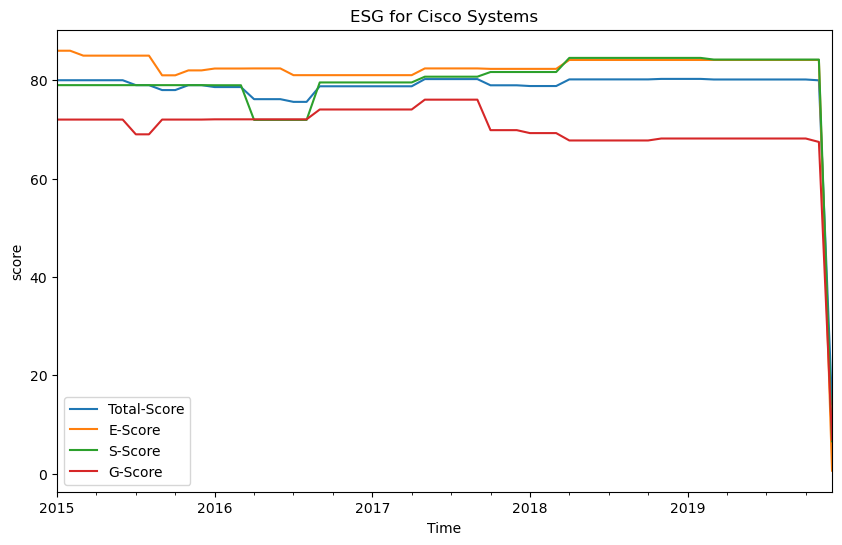

In [59]:
### Question 1.4

### Download ESG data from January 1, 2015, to December 31, 2019
hist_ESG = yesg.get_historic_esg('CSCO')
ESG_monthly_filled = hist_ESG.fillna(method='ffill')

start_date = '2015-01-01'
end_date = '2019-12-31'
ESG = ESG_monthly_filled[start_date:end_date]

### Plot ESG data of Cisco
ESG.plot(figsize=(10, 6))
plt.xlabel('Time')
plt.ylabel('score')
plt.title('ESG for Cisco Systems')

1.4 Imported yesg to retrieve the ESG data of Cisco Systems, subsequently used fillna() function to replace missing values with previous month's value. Used data slicing to set the timeframe for the ESG data from January 1, 2015, to December 31, 2019. Then, used matplotlib.pyplot to compute the graph for Cisco System's ESG data.

In [60]:
### Question 1.5

# Calculate correlation
correlation = csco_monthly_return.corr(ESG['Total-Score'])
# Print the correlation
print(f"The correlation between the stock price of Cisco and its ESG total score from 1 Jan 2015 to 31 Dec 2019 is {correlation:.4f}")

The correlation between the stock price of Cisco and its ESG total score from 1 Jan 2015 to 31 Dec 2019 is -0.0937


1.5 Used corr() to compute the correlation coefficient between monthly stock price and ESG total score.

In [48]:
pip install meteostat

  Obtaining dependency information for meteostat from https://files.pythonhosted.org/packages/23/93/0d277de2b38238072b850e33fbd94e230951f2e5d7ac140ae221a05215b0/meteostat-1.6.7-py3-none-any.whl.metadata
Note: you may need to restart the kernel to use updated packages.


In [61]:
### Question 2
### City: Hong Kong
### Birth Month: November

from datetime import datetime
from meteostat import Point, Daily

### Time Period
start = datetime(2001, 11, 1)
end = datetime(2001, 11, 30)
### Location 
location = Point(22.2793278, 114.1628131, 74)
### Fetch Weather Data
data = Daily(location, start, end)
HK_data = data.fetch()

### HDD
T_base = 18
hdds = [max(T_base - temp, 0) for temp in HK_data['tavg']] 
hdds

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0.6999999999999993,
 2.0,
 0.0,
 0,
 0,
 0,
 0,
 0,
 nan,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

Question 2. Used datetime and meteostat to extract the time period and to fetch weather data. Daily, latitude, longitude, and altitude of Hong Kong is used to specify the daily weather data.
Latitude of HK: 22.2793278
Longtitude of HK: 114.1628131
Altitude of HK: 74